In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
import xgboost as xgb

In [105]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
train_data=pd.read_excel("Data_Train.xlsx")

In [48]:
test_data=pd.read_excel("Data_Test.xlsx")

In [49]:
data=pd.concat([train_data,test_data],axis='index')

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [50]:
data.isna().sum()

Author             0
BookCategory       0
Edition            0
Genre              0
Price           1560
Ratings            0
Reviews            0
Synopsis           0
Title              0
dtype: int64

In [10]:
data.columns

Index(['Author', 'BookCategory', 'Edition', 'Genre', 'Price', 'Ratings',
       'Reviews', 'Synopsis', 'Title'],
      dtype='object')

In [11]:
data['Author'].value_counts()

Agatha Christie    87
Ladybird           63
DK                 61
Albert Uderzo      48
Nora Roberts       40
                   ..
Kari Hotakainen     1
WEBB                1
Meena Kandasamy     1
Ranjit Mereddy      1
Robin Norwood       1
Name: Author, Length: 4372, dtype: int64

In [51]:
label=LabelEncoder()

In [52]:
data['Author']=label.fit_transform(data['Author'])

In [53]:
data["BookCategory"].value_counts()

Action & Adventure                      1036
Crime, Thriller & Mystery                878
Comics & Mangas                          744
Language, Linguistics & Writing          733
Biographies, Diaries & True Accounts     732
Romance                                  702
Humour                                   670
Computing, Internet & Digital Media      648
Arts, Film & Photography                 638
Sports                                   614
Politics                                 402
Name: BookCategory, dtype: int64

In [54]:
data["BookCategory"].value_counts()

Action & Adventure                      1036
Crime, Thriller & Mystery                878
Comics & Mangas                          744
Language, Linguistics & Writing          733
Biographies, Diaries & True Accounts     732
Romance                                  702
Humour                                   670
Computing, Internet & Digital Media      648
Arts, Film & Photography                 638
Sports                                   614
Politics                                 402
Name: BookCategory, dtype: int64

In [20]:
data.columns

Index(['Author', 'BookCategory', 'Edition', 'Genre', 'Price', 'Ratings',
       'Reviews', 'Synopsis', 'Title'],
      dtype='object')

In [22]:
data["Edition"].value_counts()

Paperback,– 5 Oct 2017                60
Paperback,– 2016                      58
Paperback,– 2017                      47
Paperback,– 2019                      37
Paperback,– 2013                      35
                                      ..
Mass Market Paperback,– 3 Mar 2009     1
Paperback,– 12 Jan 2000                1
Paperback,– Import, 16 Aug 2017        1
Paperback,– Import, 22 Oct 2017        1
Paperback,– 31 Dec 1997                1
Name: Edition, Length: 3882, dtype: int64

In [55]:
data["Edition"]=label.fit_transform(data["Edition"])

In [56]:
data["Genre"].value_counts()

Action & Adventure (Books)               1183
Romance (Books)                           517
Biographies & Autobiographies (Books)     463
Crime, Thriller & Mystery (Books)         335
Contemporary Fiction (Books)              325
                                         ... 
Sculpture                                   1
Creative Writing & Composition              1
Visual C++ Programming                      1
Handwriting Reference                       1
Chemistry Books                             1
Name: Genre, Length: 363, dtype: int64

In [26]:
data['Genre'].nunique()

363

In [27]:
data["Ratings"].value_counts()

1 customer review       1328
2 customer reviews       886
3 customer reviews       613
4 customer reviews       444
5 customer reviews       379
                        ... 
405 customer reviews       1
255 customer reviews       1
381 customer reviews       1
297 customer reviews       1
304 customer reviews       1
Name: Ratings, Length: 368, dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 9 columns):
Author          7797 non-null int32
BookCategory    7797 non-null int32
Edition         7797 non-null int32
Genre           7797 non-null object
Price           6237 non-null float64
Ratings         7797 non-null object
Reviews         7797 non-null object
Synopsis        7797 non-null object
Title           7797 non-null object
dtypes: float64(1), int32(3), object(5)
memory usage: 517.8+ KB


In [57]:
data["Ratings"]=data["Ratings"].apply(lambda x:x.rstrip(" customer reviews"))

In [64]:
data["Ratings"].value_counts()

1      1328
2       886
3       613
4       444
5       379
       ... 
804       1
267       1
249       1
190       1
358       1
Name: Ratings, Length: 368, dtype: int64

In [63]:
data["Ratings"]=data["Ratings"].apply(lambda x:x.replace(",",""))

In [66]:
data["Ratings"]=data["Ratings"].astype(int)

In [67]:
data.columns

Index(['Author', 'BookCategory', 'Edition', 'Genre', 'Price', 'Ratings',
       'Reviews', 'Synopsis', 'Title'],
      dtype='object')

In [68]:
data["Reviews"].value_counts()

5.0 out of 5 stars    1751
4.0 out of 5 stars     713
4.5 out of 5 stars     626
4.6 out of 5 stars     491
4.4 out of 5 stars     488
4.3 out of 5 stars     450
4.7 out of 5 stars     412
4.2 out of 5 stars     406
4.1 out of 5 stars     381
3.9 out of 5 stars     300
4.8 out of 5 stars     272
3.8 out of 5 stars     239
3.7 out of 5 stars     203
3.0 out of 5 stars     176
3.6 out of 5 stars     145
3.5 out of 5 stars     143
4.9 out of 5 stars      99
3.4 out of 5 stars      92
3.3 out of 5 stars      74
1.0 out of 5 stars      65
3.1 out of 5 stars      57
3.2 out of 5 stars      50
2.0 out of 5 stars      44
2.9 out of 5 stars      36
2.5 out of 5 stars      23
2.7 out of 5 stars      18
2.8 out of 5 stars      12
2.3 out of 5 stars       7
1.5 out of 5 stars       6
2.6 out of 5 stars       5
2.4 out of 5 stars       5
2.2 out of 5 stars       3
1.4 out of 5 stars       2
1.6 out of 5 stars       1
2.1 out of 5 stars       1
1.7 out of 5 stars       1
Name: Reviews, dtype: int64

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 9 columns):
Author          7797 non-null int32
BookCategory    7797 non-null object
Edition         7797 non-null int32
Genre           7797 non-null object
Price           6237 non-null float64
Ratings         7797 non-null int32
Reviews         7797 non-null object
Synopsis        7797 non-null object
Title           7797 non-null object
dtypes: float64(1), int32(3), object(5)
memory usage: 517.8+ KB


In [71]:
data["Reviews"]=data["Reviews"].apply(lambda x:x.replace(" out of 5 stars",""))

In [73]:
data["Reviews"]=data["Reviews"].astype(float)

In [76]:
data["Synopsis"]=label.fit_transform(data["Synopsis"])

In [78]:
data["Title"]=label.fit_transform(data["Title"])

In [79]:
data.head()

,Author,BookCategory,Edition,Genre,Price,Ratings,Reviews,Synopsis,Title
0,748,Action & Adventure,1231,Action & Adventure (Books),220.00,8,4.0,4580,5803
1,370,"Biographies, Diaries & True Accounts",3164,Cinema & Broadcast (Books),202.93,14,3.9,711,2120
2,4045,Humour,2272,International Relations,299.00,6,4.8,37,2982
3,79,"Crime, Thriller & Mystery",3000,Contemporary Fiction (Books),180.00,13,4.1,678,189
4,1138,"Arts, Film & Photography",99,Photography Textbooks,965.62,1,5.0,2228,2853


In [81]:
data["Genre"]=label.fit_transform(data["Genre"])

In [82]:
data.head()

,Author,BookCategory,Edition,Genre,Price,Ratings,Reviews,Synopsis,Title
0,748,Action & Adventure,1231,1,220.00,8,4.0,4580,5803
1,370,"Biographies, Diaries & True Accounts",3164,78,202.93,14,3.9,711,2120
2,4045,Humour,2272,202,299.00,6,4.8,37,2982
3,79,"Crime, Thriller & Mystery",3000,96,180.00,13,4.1,678,189
4,1138,"Arts, Film & Photography",99,264,965.62,1,5.0,2228,2853


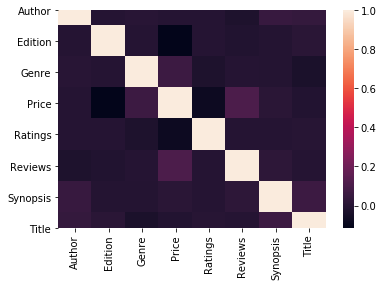

In [84]:
sns.heatmap(data.corr())

In [86]:
cat_col_data=data.select_dtypes(exclude=np.number)

In [87]:
num_col_data=data.select_dtypes(include=np.number)

In [89]:
cat_col_processed=pd.get_dummies(cat_col_data)

In [91]:
df=pd.concat([cat_col_processed,num_col_data],axis='columns')

In [98]:
df_train=df[df['Price'].notna()]

In [100]:
df_test=df[df["Price"].isna()]

In [107]:
X=df_train.drop(columns={"Price"})

In [109]:
y=df_train["Price"]

In [110]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=99)

In [113]:
lin=LinearRegression()

In [114]:
lin.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
train_pred=lin.predict(train_X)

In [116]:
test_pred=lin.predict(test_X)

In [117]:
print("RMSE for train:",np.sqrt(mean_squared_error(train_y,train_pred)))

RMSE for train: 568.9283164986878


In [118]:
print("RMSE for test:",np.sqrt(mean_squared_error(test_y,test_pred)))

RMSE for test: 811.1668795706629


In [119]:
std=StandardScaler()

In [120]:
X_std=std.fit_transform(X)

In [121]:
nor=MinMaxScaler()

In [122]:
X_nor=nor.fit_transform(X)

In [123]:
def model_selection(model,X,y):
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=99)
    model.fit(train_X,train_y)
    train_pred=model.predict(train_X)
    test_pred=model.predict(test_X)
    print("RMSE for train:",np.sqrt(mean_squared_error(train_y,train_pred)))
    print("RMSE for test:",np.sqrt(mean_squared_error(test_y,test_pred)))
    


In [124]:
model_selection(lin,X_std,y)

RMSE for train: 568.9586311461791
RMSE for test: 811.3346290413834


In [126]:
model_selection(lin,X_nor,y)

RMSE for train: 568.9307336492149
RMSE for test: 811.1975932797493


In [125]:
tree=DecisionTreeRegressor()

In [127]:
model_selection(tree,X_std,y)

RMSE for train: 4.631458772235333
RMSE for test: 939.5972785622201


In [134]:
rfc=RandomForestRegressor(n_estimators=400,max_depth=15)

In [135]:
model_selection(rfc,X_std,y)

RMSE for train: 228.5126880301201
RMSE for test: 779.0021252686819


In [156]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [157]:
param_grid={"n_estimators":n_estimators,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
           "min_samples_leaf":min_samples_leaf}

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          verbose = 2)

In [ ]:
grid_search.fit(train_X,train_y)

Fitting 5 folds for each of 990 candidates, totalling 4950 fits
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   4.9s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   4.9s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   4.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   4.4s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   4.7s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   8.6s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   9.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_s

In [155]:
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [148]:
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]